# 5.4 Modeling multi-body interactions

This notebook is a work in progress and will be filled with content soon.

In [1]:
!git clone https://github.com/mapequation/mapping-hypergraphs.git

fatal: destination path 'mapping-hypergraphs' already exists and is not an empty directory.


In [2]:
!cargo build --release --manifest-path mapping-hypergraphs/create-representations/Cargo.toml

    Finished `release` profile [optimized] target(s) in 0.01s


Usage
```
cargo run -- representation hypergraph outfile
```
Where `representation` can be any of `-[b|B|u|U|m|M|hs|HS]` and the hypergraph
is in the same format as in the main repository.

| Flag   | Network representation        |
|--------|-------------------------------|
| `-b`   | bipartite                     |
| `-B`   | bipartite non-lazy            |
| `-u`   | unipartite                    |
| `-U`   | unipartite non-lazy           |
| `-m`   | multilayer                    |
| `-M`   | multilayer non-lazy           |
| `-hs`  | hyperedge-similarity          |
| `-HS`  | hyperedge-similarity non-lazy |


In [3]:
!cargo run --manifest-path mapping-hypergraphs/create-representations/Cargo.toml -- -b mapping-hypergraphs/data/example.txt output/example_bipartite.net

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.00s
     Running `mapping-hypergraphs/create-representations/target/debug/create-representations -b mapping-hypergraphs/data/example.txt output/example_bipartite.net`
Preprocessing...
Generating lazy bipartite...
Done!


In [4]:
from infomap import Infomap
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import subprocess
from pathlib import Path
import seaborn as sns
from coloraide import Color
import sys

In [5]:
def convert_hypergraph(input_filename, output_filename, representation_flag="-b"):
    """
    Convert a hypergraph file to a network representation using the Rust tool.

    Parameters
    ----------
    input_filename : str
        Path to the hypergraph file.
    output_filename : str
        Path for the output network file.
    representation_flag : str
        One of the supported network representation flags, default '-b' for bipartite.
    """
    input_path = Path(input_filename).resolve()
    output_path = Path(output_filename).resolve()

    cargo_manifest = Path("mapping-hypergraphs/create-representations/Cargo.toml").resolve()

    cmd = [
        "cargo", "run",
        "--manifest-path", str(cargo_manifest),
        "--",
        representation_flag,
        str(input_path),
        str(output_path)
    ]

    print("Running:", " ".join(cmd))
    subprocess.run(cmd, check=True)

convert_hypergraph(
    input_filename="mapping-hypergraphs/data/example-paper.txt",
    output_filename="output/example_bipartite.net",
    representation_flag="-b"
)


convert_hypergraph(
    input_filename="mapping-hypergraphs/data/example-paper.txt",
    output_filename="output/example_multilayer.net",
    representation_flag="-m"
)

Running: cargo run --manifest-path /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/mapping-hypergraphs/create-representations/Cargo.toml -- -b /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/mapping-hypergraphs/data/example-paper.txt /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/output/example_bipartite.net


    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.01s
     Running `mapping-hypergraphs/create-representations/target/debug/create-representations -b /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/mapping-hypergraphs/data/example-paper.txt /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/output/example_bipartite.net`


Preprocessing...
Generating lazy bipartite...
Done!
Running: cargo run --manifest-path /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/mapping-hypergraphs/create-representations/Cargo.toml -- -m /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/mapping-hypergraphs/data/example-paper.txt /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/output/example_multilayer.net
Preprocessing...
Generating lazy multilayer...
Done!


    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.00s
     Running `mapping-hypergraphs/create-representations/target/debug/create-representations -m /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/mapping-hypergraphs/data/example-paper.txt /Users/daniel/dev/projects/icelab/code/notebooks/infomap-tutorial-notebooks/output/example_multilayer.net`


In [6]:
def run_infomap(filename: str, columns=["node_id", "name", "flow", "module_id"], **infomap_args):
    im = Infomap(silent=True, **infomap_args)
    im.read_file(filename)
    im.run()
    return im.get_dataframe(columns=columns)


filename = "output/example_bipartite.net"
df_infomap_bipartite = run_infomap(filename, skip_adjust_bipartite_flow=False).set_index("node_id")
df_infomap_bipartite

,name,flow,module_id
node_id,,,
7,i,0.179775,1
9,g,0.168539,1
8,h,0.089888,1
10,j,0.089888,1
14,Hyperedge 4,0.000000,1
15,Hyperedge 5,0.000000,1
3,c,0.157303,2
6,f,0.112360,2
1,a,0.089888,2


In [7]:
df_infomap_multilayer = run_infomap("output/example_multilayer.net", ["state_id", "node_id", "layer_id", "name", "flow", "module_id"]).set_index("state_id")
df_infomap_multilayer

,node_id,layer_id,name,flow,module_id
state_id,,,,,
12,7,5,i,0.100977,1
15,10,5,j,0.092100,1
11,9,4,g,0.091878,1
9,7,4,i,0.089215,1
14,9,5,g,0.053263,1
13,8,5,h,0.052708,1
10,8,4,h,0.047271,1
5,9,3,g,0.035952,1
2,3,1,c,0.093742,2


In [8]:
sys.path.append("mapping-hypergraphs")
from hypergraph.network.hypergraph import HyperGraph

def parse_hypergraph(filename):
    with open(filename) as fp:
        H = HyperGraph.from_iter(fp)
        return H
    
H = parse_hypergraph("mapping-hypergraphs/data/example-paper.txt")
H


HyperGraph(nodes=[Node(id=1, name='a'), Node(id=2, name='b'), Node(id=3, name='c'), Node(id=4, name='d'), Node(id=5, name='e'), Node(id=6, name='f'), Node(id=7, name='i'), Node(id=8, name='h'), Node(id=9, name='g'), Node(id=10, name='j')], edges=[HyperEdge(id=1, nodes=frozenset({Node(id=1, name='a'), Node(id=2, name='b'), Node(id=3, name='c')}), omega=3.0), HyperEdge(id=2, nodes=frozenset({Node(id=4, name='d'), Node(id=6, name='f'), Node(id=5, name='e')}), omega=1.0), HyperEdge(id=3, nodes=frozenset({Node(id=6, name='f'), Node(id=9, name='g'), Node(id=3, name='c')}), omega=2.0), HyperEdge(id=4, nodes=frozenset({Node(id=8, name='h'), Node(id=7, name='i'), Node(id=9, name='g')}), omega=3.0), HyperEdge(id=5, nodes=frozenset({Node(id=8, name='h'), Node(id=7, name='i'), Node(id=10, name='j'), Node(id=9, name='g')}), omega=3.0)], weights=[Gamma(edge=1, node=Node(id=1, name='a'), gamma=2.0), Gamma(edge=1, node=Node(id=3, name='c'), gamma=2.0), Gamma(edge=2, node=Node(id=4, name='d'), gamma=2.

In [9]:
H.edges

[HyperEdge(id=1, nodes=frozenset({Node(id=1, name='a'), Node(id=2, name='b'), Node(id=3, name='c')}), omega=3.0),
 HyperEdge(id=2, nodes=frozenset({Node(id=4, name='d'), Node(id=6, name='f'), Node(id=5, name='e')}), omega=1.0),
 HyperEdge(id=3, nodes=frozenset({Node(id=6, name='f'), Node(id=9, name='g'), Node(id=3, name='c')}), omega=2.0),
 HyperEdge(id=4, nodes=frozenset({Node(id=8, name='h'), Node(id=7, name='i'), Node(id=9, name='g')}), omega=3.0),
 HyperEdge(id=5, nodes=frozenset({Node(id=8, name='h'), Node(id=7, name='i'), Node(id=10, name='j'), Node(id=9, name='g')}), omega=3.0)]

In [10]:
def create_bipartite_graph(H : HyperGraph):
    weights = {(g.edge, g.node.id): g.gamma for g in H.weights}
    G = nx.Graph()
    N = len(H.nodes)
    for node in H.nodes:
        G.add_node(node.id, name=node.name, node_type="physical")
    for edge in H.edges:
        G.add_node(edge.id+N, name=edge.id, node_type="hyperedge")
        for n in edge.nodes:
            G.add_edge(edge.id+N, n.id, weight=weights[(edge.id, n.id)])
    return G

G = create_bipartite_graph(H)
print(G)

Graph with 15 nodes and 16 edges


In [11]:
# Save Infomap modules as node attributes
for n in G:
    G.nodes[n]["module_id"] = df_infomap_bipartite.loc[n, 'module_id']

G.nodes.data()

NodeDataView({1: {'name': 'a', 'node_type': 'physical', 'module_id': np.int64(2)}, 2: {'name': 'b', 'node_type': 'physical', 'module_id': np.int64(2)}, 3: {'name': 'c', 'node_type': 'physical', 'module_id': np.int64(2)}, 4: {'name': 'd', 'node_type': 'physical', 'module_id': np.int64(2)}, 5: {'name': 'e', 'node_type': 'physical', 'module_id': np.int64(2)}, 6: {'name': 'f', 'node_type': 'physical', 'module_id': np.int64(2)}, 7: {'name': 'i', 'node_type': 'physical', 'module_id': np.int64(1)}, 8: {'name': 'h', 'node_type': 'physical', 'module_id': np.int64(1)}, 9: {'name': 'g', 'node_type': 'physical', 'module_id': np.int64(1)}, 10: {'name': 'j', 'node_type': 'physical', 'module_id': np.int64(1)}, 11: {'name': 1, 'node_type': 'hyperedge', 'module_id': np.int64(2)}, 12: {'name': 2, 'node_type': 'hyperedge', 'module_id': np.int64(2)}, 13: {'name': 3, 'node_type': 'hyperedge', 'module_id': np.int64(2)}, 14: {'name': 4, 'node_type': 'hyperedge', 'module_id': np.int64(1)}, 15: {'name': 5, 'no

In [12]:
palette = sns.color_palette().as_hex()
palette = [Color(c).set("hsl.lightness", 0.7) for c in palette]
palette = sns.palettes._ColorPalette(palette)
palette

[color(srgb 0.48815 0.73839 0.91185 / 1),
 color(srgb 1 0.68133 0.4 / 1),
 color(srgb 0.52941 0.87059 0.52941 / 1),
 color(srgb 0.90751 0.49249 0.49486 / 1),
 color(srgb 0.7055 0.58165 0.81835 / 1),
 color(srgb 0.7907 0.64 0.6093 / 1),
 color(srgb 0.89756 0.50244 0.77683 / 1),
 color(srgb 0.7 0.7 0.7 / 1),
 color(srgb 0.90583 0.90852 0.49148 / 1),
 color(srgb 0.46 0.89565 0.94 / 1)]

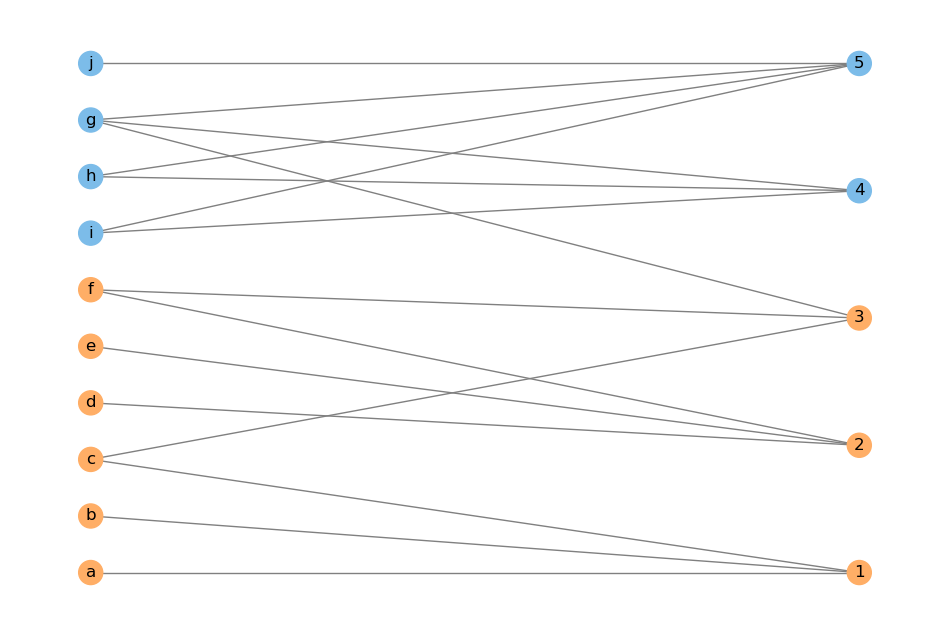

In [13]:
def draw_bipartite_graph(G: nx.Graph):

    # Map nodes to colors based on their module_id
    node_colors = [palette[G.nodes[n]["module_id"]-1] for n in G.nodes]

    # Generate layout
    physical_nodes = [n for n in G if G.nodes[n]["node_type"] == "physical"]
    pos = nx.bipartite_layout(G, physical_nodes)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(
        G,
        pos=pos,
        labels=nx.get_node_attributes(G, "name"),
        node_color=node_colors,
        with_labels=True,
        node_size=300,
        edge_color='gray'
    )
    plt.axis('off')

draw_bipartite_graph(G)